In [1]:
# 必要ライブラリの宣言
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# PDF出力用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

/var/folders/83/5p_5c8c97tz9m464jrrqlzyh0000gn/T/ipykernel_9682/1789447411.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


In [6]:
# サンプルデータの宣言
sampleData1 = np.array([[166, 58.7],[176.0, 75.7],[171.0, 62.1],[173.0, 70.4],[169.0,60.1]])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


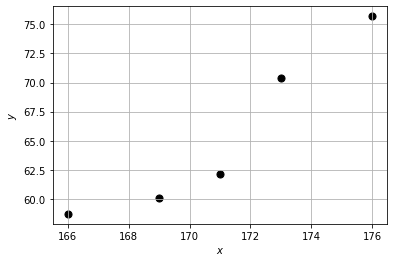

In [13]:
# 散布図表示
for p in sampleData1:
    plt.scatter(p[0], p[1], c='k', s=50)
plt.grid()
plt.xlabel('$x$') # $$で囲むとイタリックになるみたい
plt.ylabel('$y$')
plt.show()

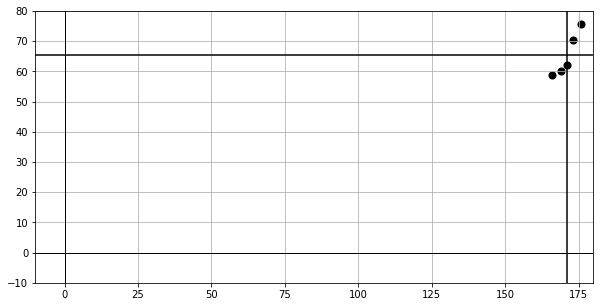

In [15]:
plt.figure(figsize=(10,5))
for p in sampleData1:
    plt.scatter(p[0], p[1], c='k', s=50)
plt.grid()
plt.plot([0,0],[-10,80],c='k',lw=1)
plt.plot([171,171],[-10,80],c='k')
plt.plot([-10,180],[0,0],c='k',lw=1)
plt.plot([-10,180],[65.4,65.4],c='k')
plt.xlim(-10,180)
plt.ylim(-10,80)
plt.show()

In [9]:
# 平均値の計算
means = sampleData1.mean(axis=0)
print(means)

[171.   65.4]


In [10]:
# 座標系を平均値=0に変換する
sampleData2 = sampleData1 - means
print(sampleData2)

[[-5.  -6.7]
 [ 5.  10.3]
 [ 0.  -3.3]
 [ 2.   5. ]
 [-2.  -5.3]]


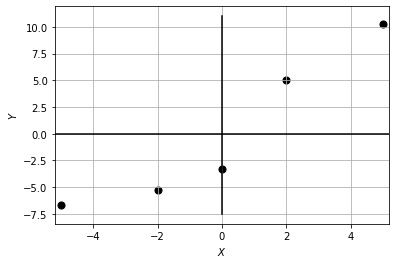

In [17]:
# 新しい座標系での散布図表示
for p in sampleData2:
    plt.scatter(p[0], p[1], c='k', s=50)
plt.grid()
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot([-6,6],[0,0], c='k')
plt.plot([0,0],[-7.5,11],c='k')
plt.xlim(-5.2,5.2)
plt.show()

In [55]:
print(sampleData2.sum(axis=0))

sampleData3 = np.square(sampleData2)
print(sampleData3)
coef1 = sampleData3.sum(axis=0)[0]
coef3 = sampleData3.sum(axis=0)[1]
print(coef1)
print(coef3)

sampleData4 = sampleData2[:, 0]*sampleData2[:, 1]
print(sampleData4)
coef2 = 2*sampleData4.sum(axis=0)
print(coef2)

[ 0.00000000e+00 -1.42108547e-14]
[[ 25.    44.89]
 [ 25.   106.09]
 [  0.    10.89]
 [  4.    25.  ]
 [  4.    28.09]]
58.0
214.96000000000004
[33.5 51.5 -0.  10.  10.6]
211.20000000000002


In [56]:
# 予測関数の定義
def L(W0, W1):
    return(5*W0**2 + coef1*W1**2 - coef2*W1 + coef3)

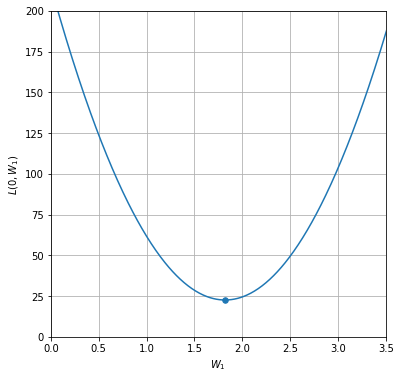

In [57]:
# L(0, W1)のグラフ
plt.figure(figsize=(6,6))
W1 = np.linspace(0, 4, 501)
#plt.ylim(1,3)
plt.plot(W1, L(0,W1))
plt.scatter(1.82,22.69,s=30)
plt.xlabel('$W_1$')
plt.ylabel('$L(0,W_1)$')
plt.grid()
plt.xlim(0,3.5)
plt.ylim(0,200)
plt.show()

In [58]:
def pred1(X):
    return 1.82*X

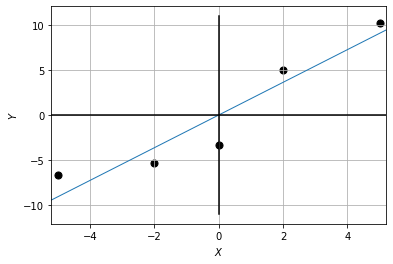

In [59]:
# 散布図と回帰直線(変換後)
for p in sampleData2:
    plt.scatter(p[0], p[1], c='k', s=50)
X=np.array([-6,6])
plt.plot(X, pred1(X), lw=1)
plt.plot([-6,6],[0,0], c='k')
plt.plot([0,0],[-11,11],c='k')
plt.xlim(-5.2,5.2)
plt.grid()
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.show()

In [60]:
def pred2(x):
    return 1.82*x - 245.9

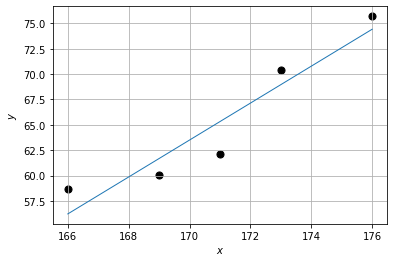

In [61]:
# 散布図と回帰直線(オリジナル)
for p in sampleData1:
    plt.scatter(p[0], p[1], c='k', s=50)
x=np.array([166,176])
plt.plot(x, pred2(x), lw=1)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()